## Bibliotecas

In [3]:
import pandas as pd

In [5]:
import zipfile

In [6]:
import os

In [7]:
import matplotlib.pyplot as plt

# Base 1 - Série Temporal

Problema de classificação de sequênciia

## Quantidades de series

In [60]:

num_folders = len([d for d in os.listdir('series_train.parquet') if os.path.isdir(os.path.join('series_train.parquet', d))])
print(f"Número de séries: {num_folders}")

Número de séries: 996


## Verificando se Todas as Séries Possuem Colunas Iguais


In [61]:
def verificar_colunas_parquet(diretorio_principal):
    # Lista para armazenar as colunas dos arquivos parquet
    colunas_conjunto = None
    
    # Caminha pelas pastas e subpastas
    for root, dirs, files in os.walk(diretorio_principal):
        for file in files:
            # Verifica se o arquivo é parquet
            if file.endswith(".parquet"):
                # Caminho completo do arquivo parquet
                caminho_arquivo = os.path.join(root, file)
                
                # Lê o arquivo parquet
                df = pd.read_parquet(caminho_arquivo)
                
                # Se ainda não inicializamos o conjunto de colunas, faz isso
                if colunas_conjunto is None:
                    colunas_conjunto = set(df.columns)
                else:
                    # Compara as colunas do dataframe com o conjunto de colunas
                    if set(df.columns) != colunas_conjunto:
                        print(f"Arquivo {file} em {root} tem colunas diferentes!")
    
    # Verifica se algum arquivo teve colunas diferentes
    if colunas_conjunto:
        print("Todos os arquivos possuem as mesmas colunas.")
    else:
        print("Nenhum arquivo parquet encontrado.")

# Caminho para o diretório principal onde estão as pastas
diretorio_principal = "/caminho/para/sua/pasta"
verificar_colunas_parquet('series_train.parquet')

Todos os arquivos possuem as mesmas colunas.


## Verifica se em Alguma tem Valor Faltante

In [70]:

def verificar_valores_faltantes(diretorio_principal):
    # Caminha pelas pastas e subpastas
    for root, dirs, files in os.walk(diretorio_principal):
        for file in files:
            # Verifica se o arquivo é Parquet
            if file.endswith(".parquet"):
                # Caminho completo do arquivo Parquet
                caminho_arquivo = os.path.join(root, file)
                
                # Tenta ler o arquivo Parquet
                try:
                    df = pd.read_parquet(caminho_arquivo)
                    
                    # Verifica se há valores faltantes
                    if df.isnull().values.any():
                        colunas_com_faltantes = df.columns[df.isnull().any()].tolist()
                        print(f"Arquivo {file} em {root} tem valores faltantes nas colunas: {colunas_com_faltantes}")
                except Exception as e:
                    print(f"Erro ao processar o arquivo {file} em {root}: {e}")

# Caminho para o diretório principal onde estão as subpastas
diretorio_principal = "caminho/da/pasta/principal"  # Substitua pelo caminho correto

# Executar a verificação
verificar_valores_faltantes('series_train.parquet')


## Criação de CSV com ids e Targets das Séries

In [65]:
import os

# Caminho da pasta principal
caminho_pasta_principal = "series_train.parquet"

# Lista para armazenar os nomes das pastas sem o prefixo "id="
ids = []

# Iterar sobre os itens no diretório
for item in os.listdir(caminho_pasta_principal):
    caminho_completo = os.path.join(caminho_pasta_principal, item)
    if os.path.isdir(caminho_completo):  # Verificar se é uma pasta
        nome_sem_id = item.replace("id=", "")  # Remover o "id="
        ids.append(nome_sem_id)

# Exibir a lista de nomes de pastas
print(ids)


['00115b9f', '001f3379', '00f332d1', '01085eb3', '012cadd8', '012e3869', '029a19c9', '02cebf33', '02cf7384', '035c96dd', '03a9019b', '0417c91e', '045a0a94', '04afb6f9', '04bb1a76', '04cb2c30', '04d06a9c', '04f094a8', '051680a0', '055156e2', '059eed01', '05bbed1b', '05db1b9b', '05e94f88', '063b16fc', '064e8da5', '0668373f', '067b9287', '06c8b2fb', '06eb8adb', '070386b2', '07048067', '0720320e', '0745c390', '080698b7', '082df556', '08577722', '08660d12', '089a6b19', '09331bb8', '0983654b', '099e3614', '09b29113', '0a418b57', '0a431608', '0b4014f0', '0b50f3fa', '0b518637', '0b7d7aec', '0b7d9da6', '0bd89878', '0bfe4fc9', '0c4e2d68', '0c4eabac', '0c98f822', '0cbe4e54', '0d01bbf2', '0d279d77', '0d4800c8', '0d4fa8f4', '0d570d3e', '0d924604', '0e3b0bd2', '0ec403df', '0ed2a3c8', '0eddd8e5', '0f6b71c4', '0fbb3ca5', '101774f0', '101c27f1', '108b8659', '10ad8c48', '10e46254', '113f5798', '11739de2', '119d7562', '119e181e', '11be5d2e', '11f9b26c', '12380b06', '12a607f6', '1301f65d', '1314bc8c', '13

In [66]:
df_train= pd.read_csv('train.csv')

# Filtrar o DataFrame com base na lista de IDs
df_filtrado = df_train[df_train['id'].isin(ids)]

# Criar um novo DataFrame com os IDs e os valores correspondentes
series_target = df_filtrado[['id', 'sii']]

# Exibir o novo DataFrame
print(series_target)


            id  sii
3     00115b9f  1.0
5     001f3379  1.0
20    00f332d1  1.0
22    01085eb3  0.0
25    012cadd8  0.0
...        ...  ...
3945  fe9c71d8  0.0
3947  fecc07d6  0.0
3951  ff18b749  0.0
3957  ffcd4dbd  1.0
3958  ffed1dd5  0.0

[996 rows x 2 columns]


In [67]:
series_target = df_filtrado[['id', 'sii']].reset_index(drop=True)

In [69]:
series_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      996 non-null    object 
 1   sii     996 non-null    float64
dtypes: float64(1), object(1)
memory usage: 15.7+ KB


In [ ]:
# Salvar o novo DataFrame como CSV
#nseries_target.to_csv("series_target.csv", index=False)

## Análise Exploratória


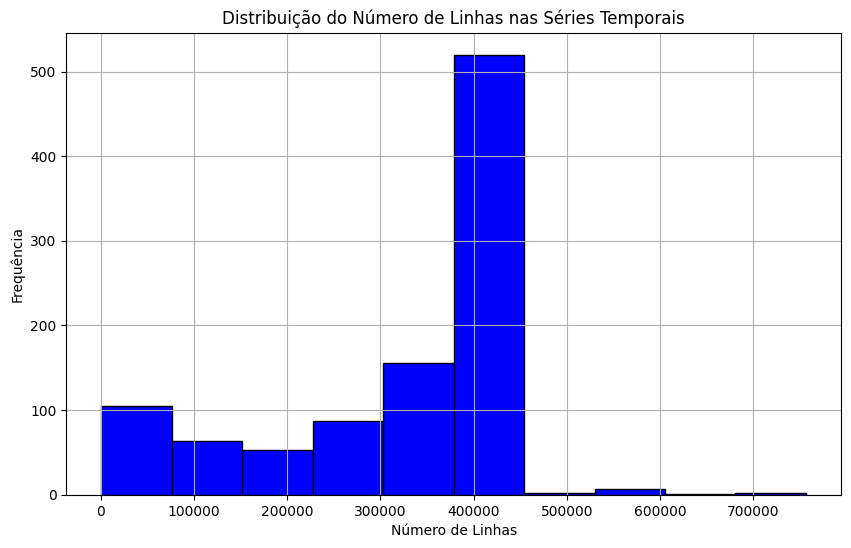

In [ ]:
# Diretório principal onde as pastas estão localizadas
root_dir = "series_train.parquet"

# Lista para armazenar o número de linhas de cada arquivo
file_row_counts = []

# Função para carregar e contar linhas
def analyze_parquet_row_counts(root_dir):
    for folder_name in os.listdir(root_dir):
        folder_path = os.path.join(root_dir, folder_name)
        
        # Verificar se é uma pasta
        if os.path.isdir(folder_path):
            
            for file_name in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file_name)
                
                # Verificar se o arquivo é um .parquet
                if file_name.endswith(".parquet"):
                    
                    # Carregar dados
                    data = pd.read_parquet(file_path)
                    
                    # Contar número de linhas
                    num_rows = len(data)
                    
                    # Adicionar ao contador geral
                    file_row_counts.append(num_rows)

# Chamar a função
analyze_parquet_row_counts(root_dir)

# Visualizar o histograma do número de linhas
plt.figure(figsize=(10, 6))
plt.hist(file_row_counts, bins=10, color='blue', edgecolor='black')
plt.title("Distribuição do Número de Linhas nas Séries Temporais")
plt.xlabel("Número de Linhas")
plt.ylabel("Frequência")
plt.grid(True)
plt.show()


In [7]:
data = pd.read_parquet('series_train.parquet\id=0a418b57\part-0.parquet')

<>:1: SyntaxWarning: invalid escape sequence '\i'
<>:1: SyntaxWarning: invalid escape sequence '\i'
C:\Users\Elke\AppData\Local\Temp\ipykernel_21036\2387834945.py:1: SyntaxWarning: invalid escape sequence '\i'
  data = pd.read_parquet('series_train.parquet\id=0a418b57\part-0.parquet')


In [8]:
data["id"] = 1

In [9]:
data.head()

,step,X,Y,Z,enmo,anglez,non-wear_flag,light,battery_voltage,time_of_day,weekday,quarter,relative_date_PCIAT,id
0,0,-0.075242,-0.256743,-0.973791,0.038081,-72.952141,0.0,5.0,4202.000000,51250000000000,2,4,-9.0,1
1,1,-0.265893,-0.270508,-0.765470,0.077430,-52.849220,0.0,0.5,4185.333496,51255000000000,2,4,-9.0,1
2,2,0.334517,-0.548602,-0.588596,0.039162,-44.118084,0.0,11.5,4185.500000,51260000000000,2,4,-9.0,1
3,3,0.000193,-0.021069,-0.999681,0.001450,-88.759613,0.0,0.0,4185.666504,51265000000000,2,4,-9.0,1
4,4,-0.000685,-0.020681,-0.997677,0.000491,-88.756958,0.0,8.5,4185.833496,51270000000000,2,4,-9.0,1


In [ ]:
from tsfresh import extract_features
from tsfresh.feature_extraction import ComprehensiveFCParameters

# Configurando o conjunto de características recomendado
fc_parameters = ComprehensiveFCParameters()

# Opcional: Você pode modificar os parâmetros para incluir/excluir categorias específicas
# Por exemplo, removendo características não relevantes:
fc_parameters["length"] = None  # Excluindo a contagem simples
fc_parameters["linear_trend"] = None  # Excluindo a tendência linear

# Extraindo métricas da série
features = extract_features(
    data,
    column_id='id',
    column_sort="step",
    default_fc_parameters=fc_parameters,
    disable_progressbar=False  # Para visualizar o progresso
)

print(features)


Feature Extraction:   0%|          | 0/12 [00:00<?, ?it/s]